In [43]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('merepresenta.csv', parse_dates=['date_birth'])
df.head()

,dni,role_type,first_name,last_name,full_name,ballot_name,partido,order,state,nickname,...,profession_4,profession_5,profession_6,Website,URL_FB_page,URL_FB_profile,URL_IG,URL_TW,URL_others,URL_photo
0,18527322.0,Diputado/a,CLAUDIO,SCARAVAGLIONE,CLAUDIO SCARAVAGLIONE,VALORES EN ACCION,CONFIANZA PUBLICA,1,BUENOS AIRES,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/claudio.scaravaglione,NaN,NaN,NaN
1,18287453.0,Diputado/a,CHRISTIAN CARLOS HERNAN,CASTILLO,CHRISTIAN CARLOS HERNAN CASTILLO,UNIR Y FORTALECER LA IZQUIERDA 1 A,FRENTE DE IZQUIERDA Y DE TRABAJADORES,1,BUENOS AIRES,NaN,...,POLITICO,NaN,NaN,NaN,NaN,https://www.facebook.com/ChristianCastillo.PTS,https://www.facebook.com/christian.castillo3,https://www.instagram.com/chipicastillo28,https://www.twitter.com/chipicastillo,https://www.pts.org.ar/Articulo-Christian-Cast...
2,37186222.0,Diputado/a,DAVID EZEQUIEL,BENITEZ,DAVID EZEQUIEL BENITEZ,UNIDOS,PARTIDO UNIDAD SOCIAL (PUS),1,BUENOS AIRES,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26206858.0,Diputado/a,MONICA BEATRIZ,AGUIRRE,MONICA BEATRIZ AGUIRRE,UNIDAD,PARTIDO MOVIMIENTO ORGANIZACION DEMOCRATICA (M...,1,BUENOS AIRES,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12418498.0,Diputado/a,HORACIO ALBERTO,VALDEZ,HORACIO ALBERTO VALDEZ,TIERRA TECHO Y TRABAJO,PARTIDO PRINCIPIOS Y VALORES,1,BUENOS AIRES,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
diputados = df[df['role_type'] == 'Diputado/a'][['gender', 'date_birth', 'partido']].sort_values('partido')
diputados = diputados[diputados['partido'].apply(lambda p: p in ('UNIÓN POR LA PATRIA', 'JUNTOS POR EL CAMBIO', 'LA LIBERTAD AVANZA'))]
def calculate_age(born):
    born = born.date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    
diputados['age'] = diputados['date_birth'].apply(calculate_age)
diputados.head()

,gender,date_birth,partido,age
1462,F,1983-07-19,JUNTOS POR EL CAMBIO,40
761,F,1987-05-05,JUNTOS POR EL CAMBIO,36
1483,M,1962-12-23,JUNTOS POR EL CAMBIO,60
244,F,1976-12-29,JUNTOS POR EL CAMBIO,46
1032,M,1994-02-20,JUNTOS POR EL CAMBIO,29


Text(0.5, 1.0, 'Diputados/as')

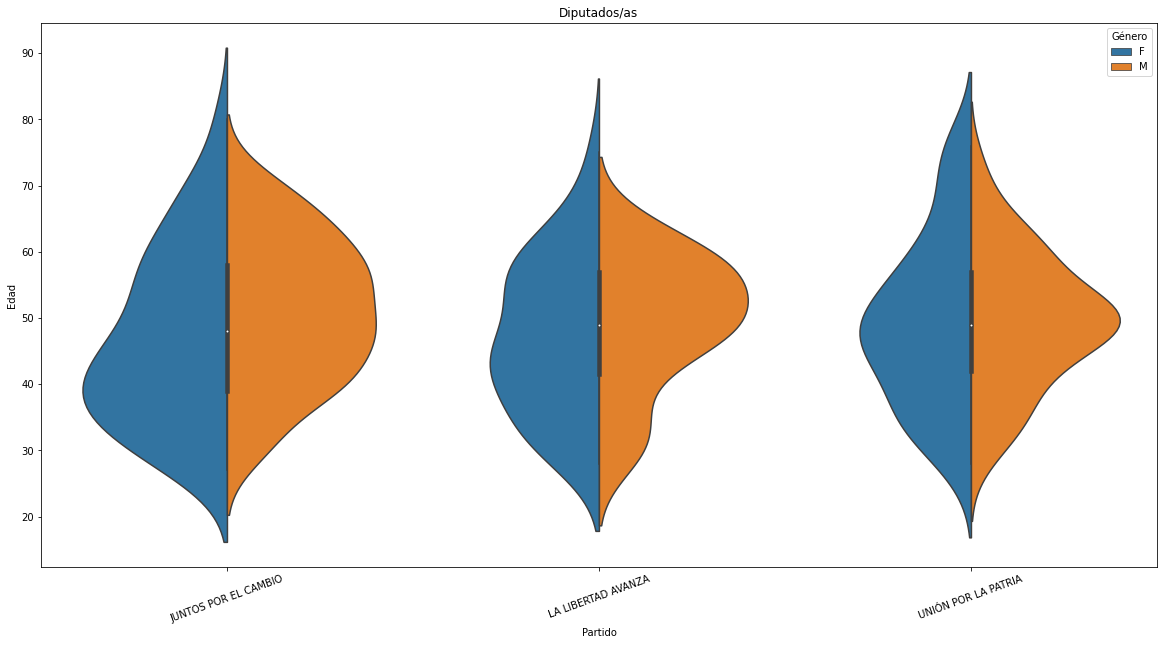

In [51]:
plt.figure(figsize=(20, 10))
ax = sns.violinplot(data=diputados, y='age', split=True, hue='gender', x='partido')
ax.tick_params(axis='x', rotation=20)
ax.set_xlabel('Partido')
ax.set_ylabel('Edad')
ax.legend(title='Género')
ax.set_title('Diputados/as')